In [2]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt

from mne import read_epochs, set_log_level
from mne.decoding import CSP
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [3]:
set_log_level('warning')
epochs = read_epochs('ica_epo.fif')

In [4]:
def dwt_coeff(x, lvl=1, db='db2'):
    coeff = pywt.wavedec(x, db, mode='sym')
    return coeff[lvl]

def avg_pwr(x):
    return np.average(x)

def standarize(array, mean, std):
    return (array-mean)/std

def energy(x):
    return np.sum(x**2)

def std(x):
    return np.std(x)

def max_coeff(x):
    return np.max(x)

def max_coeff(x):
    return np.min(x)


In [5]:
pca = PCA(n_components=0.9)
le = LabelEncoder()
scaler = StandardScaler()
linear_svm = svm.SVC()
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')

Load epochs

In [6]:
conditions = ['left','rest']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.4,500,200)

Vizualize data

C:\Users\Alberto\AppData\Local\Temp\ipykernel_15080\1153548591.py:2: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(.4,1.9).filter(7,2).get_data()


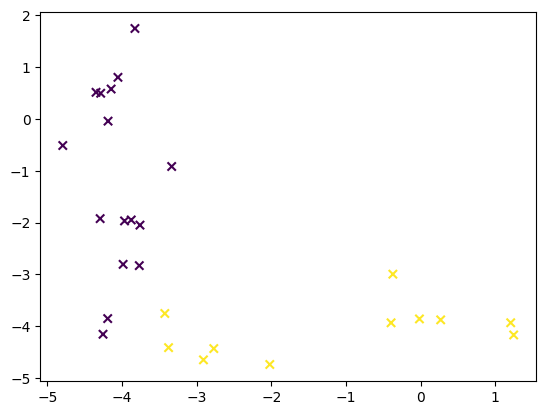

In [7]:
csp = CSP(n_components=8, reg=None, log=True, norm_trace=False, rank='info')
train_data = subset.copy().crop(.4,1.9).filter(7,2).get_data()    
data = csp.fit_transform(train_data, y)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=y, marker='x')

In [15]:
csp_test_classifiers(8,time_config, 2, 7)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_15080\3428364642.py:3: RuntimeWarning: filter_length (1691) is longer than the signal (1537), distortion is likely. Reduce filter length or filter a longer signal.
  train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()


Epoch 1/15
1/1 [==============================] - 1s 559ms/step - loss: 0.2818 - accuracy: 0.1905
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 0.1905
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2812 - accuracy: 0.1905
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2808 - accuracy: 0.1905
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2805 - accuracy: 0.1905
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2801 - accuracy: 0.1905
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2798 - accuracy: 0.1905
Epoch 8/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2795 - accuracy: 0.1905
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2791 - accuracy: 0.1905
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2788 - accuracy: 0.1905
Epoch 11/15
1/1 [===================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 602ms/step - loss: 0.2916 - accuracy: 0.3810
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2909 - accuracy: 0.3810
Epoch 3/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2902 - accuracy: 0.3810
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2895 - accuracy: 0.3810
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2888 - accuracy: 0.3810
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2882 - accuracy: 0.3810
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2875 - accuracy: 0.3810
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.3810
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2861 - accuracy: 0.3810
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2855 - accuracy: 0.3810
Epoch 11/15
1/1 [===================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 580ms/step - loss: 0.3512 - accuracy: 0.2857
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3508 - accuracy: 0.2857
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3504 - accuracy: 0.2857
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3499 - accuracy: 0.2857
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3495 - accuracy: 0.2857
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3491 - accuracy: 0.2857
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3487 - accuracy: 0.2857
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3482 - accuracy: 0.2857
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3478 - accuracy: 0.2857
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3474 - accuracy: 0.2857
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 565ms/step - loss: 0.2837 - accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2833 - accuracy: 0.4286
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2830 - accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2826 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2823 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2819 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2815 - accuracy: 0.4286
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2812 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2808 - accuracy: 0.4286
Epoch 10/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2805 - accuracy: 0.4286
Epoch 11/15
1/1 [===================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 545ms/step - loss: 0.3164 - accuracy: 0.4762
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3155 - accuracy: 0.4762
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3146 - accuracy: 0.4762
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3137 - accuracy: 0.4762
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3128 - accuracy: 0.4762
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3120 - accuracy: 0.4762
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3111 - accuracy: 0.4762
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3102 - accuracy: 0.4762
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3093 - accuracy: 0.4762
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3084 - accuracy: 0.4762
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 546ms/step - loss: 0.2205 - accuracy: 0.7143
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2203 - accuracy: 0.8095
Epoch 3/15
1/1 [==============================] - 0s 14ms/step - loss: 0.2201 - accuracy: 0.8095
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2198 - accuracy: 0.8095
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.8095
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2194 - accuracy: 0.8095
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2192 - accuracy: 0.8095
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2189 - accuracy: 0.8095
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2187 - accuracy: 0.8571
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2185 - accuracy: 0.8571
Epoch 11/15
1/1 [===================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 695ms/step - loss: 0.2238 - accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2235 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2232 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2226 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2223 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2221 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2218 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2215 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2212 - accuracy: 0.6667
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 540ms/step - loss: 0.2541 - accuracy: 0.6190
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.6190
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2527 - accuracy: 0.6190
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2520 - accuracy: 0.6190
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2514 - accuracy: 0.6190
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2507 - accuracy: 0.6190
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.6190
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2494 - accuracy: 0.6190
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.6190
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.6190
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 598ms/step - loss: 0.2184 - accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2180 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2176 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2172 - accuracy: 0.7143
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2168 - accuracy: 0.7143
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2164 - accuracy: 0.7143
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2161 - accuracy: 0.7143
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2157 - accuracy: 0.7143
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2153 - accuracy: 0.7143
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2149 - accuracy: 0.7143
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 603ms/step - loss: 0.3542 - accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3534 - accuracy: 0.4286
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3526 - accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3519 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3511 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3503 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3495 - accuracy: 0.4286
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3488 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3480 - accuracy: 0.4286
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.4286
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1/1 [==============================] - 1s 583ms/step - loss: 0.2770 - accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2763 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2755 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2748 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2734 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2727 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2719 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2712 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2705 - accuracy: 0.6667
Epoch 11/15
1/1 [==============================]

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 536ms/step - loss: 0.2466 - accuracy: 0.6667
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2461 - accuracy: 0.6667
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2457 - accuracy: 0.6667
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2453 - accuracy: 0.6667
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2448 - accuracy: 0.6667
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2444 - accuracy: 0.6667
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2440 - accuracy: 0.6667
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2435 - accuracy: 0.6667
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2431 - accuracy: 0.6667
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2427 - accuracy: 0.6667
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 599ms/step - loss: 0.2101 - accuracy: 0.5238
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2097 - accuracy: 0.5238
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2092 - accuracy: 0.5238
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2087 - accuracy: 0.5238
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2083 - accuracy: 0.5238
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2078 - accuracy: 0.5238
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2074 - accuracy: 0.5238
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2069 - accuracy: 0.5238
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2065 - accuracy: 0.5238
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2060 - accuracy: 0.5238
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 553ms/step - loss: 0.2210 - accuracy: 0.6190
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2207 - accuracy: 0.6190
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2205 - accuracy: 0.6190
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2202 - accuracy: 0.6190
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2199 - accuracy: 0.6190
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2196 - accuracy: 0.6190
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2193 - accuracy: 0.6190
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2190 - accuracy: 0.6190
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2188 - accuracy: 0.6190
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2185 - accuracy: 0.6190
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1/1 [==============================] - 1s 538ms/step - loss: 0.3332 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3326 - accuracy: 0.5238
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3319 - accuracy: 0.5238
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3313 - accuracy: 0.5238
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3306 - accuracy: 0.5238
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3300 - accuracy: 0.5238
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3293 - accuracy: 0.5238
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3287 - accuracy: 0.5238
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3280 - accuracy: 0.5238
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3274 - accuracy: 0.5238
Epoch 11/15
1/1 [==============================]

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 570ms/step - loss: 0.3572 - accuracy: 0.2857
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3563 - accuracy: 0.2857
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3553 - accuracy: 0.2857
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3544 - accuracy: 0.2857
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3535 - accuracy: 0.2857
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3526 - accuracy: 0.2857
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3516 - accuracy: 0.2857
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3507 - accuracy: 0.2857
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3497 - accuracy: 0.2857
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3488 - accuracy: 0.2857
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 500ms/step - loss: 0.3030 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3023 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3015 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3008 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3000 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2993 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2985 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2978 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2971 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.3333
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 498ms/step - loss: 0.3197 - accuracy: 0.3810
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.5238
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3183 - accuracy: 0.5238
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3176 - accuracy: 0.5238
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3169 - accuracy: 0.5238
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3162 - accuracy: 0.5238
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3155 - accuracy: 0.5238
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3149 - accuracy: 0.5238
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3142 - accuracy: 0.5238
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3135 - accuracy: 0.5238
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 521ms/step - loss: 0.2948 - accuracy: 0.2857
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2943 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2938 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2933 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2928 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2923 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2918 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.3333
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2909 - accuracy: 0.3333
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2904 - accuracy: 0.3810
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 514ms/step - loss: 0.3336 - accuracy: 0.4286
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3331 - accuracy: 0.4286
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3326 - accuracy: 0.4286
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3321 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3317 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3312 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3307 - accuracy: 0.4286
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3302 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3297 - accuracy: 0.4286
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3292 - accuracy: 0.4286
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
dwt_test_classifiers(1,'db2',time_config)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 558ms/step - loss: 0.2352 - accuracy: 0.7619
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2340 - accuracy: 0.7619
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2328 - accuracy: 0.7143
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2315 - accuracy: 0.7143
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2303 - accuracy: 0.7143
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2291 - accuracy: 0.7143
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2279 - accuracy: 0.7143
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2267 - accuracy: 0.7143
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2255 - accuracy: 0.7143
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2243 - accuracy: 0.7143
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 118ms/step - loss: 0.4052 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 505ms/step - loss: 0.3053 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3025 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3012 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2998 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2984 - accuracy: 0.3333
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2970 - accuracy: 0.3333
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2956 - accuracy: 0.3810
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2943 - accuracy: 0.3810
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3229 - accuracy: 0.4762
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3216 - accuracy: 0.4762
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3204 - accuracy: 0.4762
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3191 - accuracy: 0.4762
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3178 - accuracy: 0.4762
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3166 - accuracy: 0.4762
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3153 - accuracy: 0.4762
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.4762
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3128 - accuracy: 0.4762
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3115 - accuracy: 0.4762
Epoch 13/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.3018 - accuracy: 0.5238
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.5238
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.1945 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 0s 486ms/step - loss: 0.3294 - accuracy: 0.3333
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3279 - accuracy: 0.3333
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3264 - accuracy: 0.3333
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.3333
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3234 - accuracy: 0.3333
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.3810
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3205 - accuracy: 0.3810
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2868 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2859 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2849 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2840 - accuracy: 0.5714
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2831 - accuracy: 0.5714
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2821 - accuracy: 0.5714
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2812 - accuracy: 0.5714
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2803 - accuracy: 0.5714
Epoch 15/15
1/1 [==============================] - 0s 115ms/step - loss: 0.1813 - accuracy: 0.6667
Epoch 1/15
1/1 [==============================] - 1s 537ms/step - loss: 0.2776 - accuracy: 0.5238
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 1s 517ms/step - loss: 0.2658 - accuracy: 0.3810
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2646 - accuracy: 0.3810
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.3810
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2623 - accuracy: 0.4286
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2600 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2589 - accuracy: 0.4286
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2577 - accuracy: 0.4286
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2566 - accuracy: 0.4762
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2555 - accuracy: 0.4762
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2681 - accuracy: 0.4762
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2669 - accuracy: 0.4762
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.4762
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2645 - accuracy: 0.4762
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.3345 - accuracy: 0.1667
Epoch 1/15
1/1 [==============================] - 1s 536ms/step - loss: 0.2266 - accuracy: 0.6190
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2254 - accuracy: 0.6190
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2242 - accuracy: 0.6190
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2231 - accuracy: 0.6190
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2219 - accuracy: 0.6190
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.2807 - accuracy: 0.4286
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.4286
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2784 - accuracy: 0.4762
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2772 - accuracy: 0.4762
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2760 - accuracy: 0.4762
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2748 - accuracy: 0.4762
Epoch 11/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2737 - accuracy: 0.4762
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2726 - accuracy: 0.4762
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2714 - accuracy: 0.4762
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2703 - accuracy: 0.4762
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 120ms/step - loss: 0.3238 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 548ms/step - loss: 0.2403 - accuracy: 0.5714
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2392 - accuracy: 0.5714
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2380 - accuracy: 0.5714
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2369 - accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2358 - accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2346 - accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2335 - accuracy: 0.5714
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2324 - accuracy: 0.5714
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2313 - accuracy: 0.5714
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.2947 - accuracy: 0.3810
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2935 - accuracy: 0.3810
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2924 - accuracy: 0.4286
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2912 - accuracy: 0.4286
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2901 - accuracy: 0.4286
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2890 - accuracy: 0.4286
Epoch 15/15
1/1 [==============================] - 0s 124ms/step - loss: 0.2400 - accuracy: 0.3333
Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.2902 - accuracy: 0.3810
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2890 - accuracy: 0.3810
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.3810
Epoch 4/15
1/1 [=========================

left vs right

In [20]:
conditions = ['left','right']
subset = epochs[conditions].copy()
subset.drop_channels(subset.info['bads'])
subset = subset.pick(['eeg'])
subset = subset.apply_baseline((-1.4,-0.4))
y = le.fit_transform(subset.events[:,2])
time_config = (3,0.2,400,100)

In [28]:
csp_test_classifiers(12,time_config, 18, 7)

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 65.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Epoch 1/15
1/1 [==============================] - 1s 519ms/step - loss: 0.2569 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.4800
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2545 - accuracy: 0.4800
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2533 - accuracy: 0.4800
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2521 - accuracy: 0.4800
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2509 - accuracy: 0.4800
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2497 - accuracy: 0.4800
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2486 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2474 - accuracy: 0.5600
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 0.5600
Epoch 11/15
1/1 [====================

1/1 [==============================] - 0s 5ms/step - loss: 0.2200 - accuracy: 0.6800
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2190 - accuracy: 0.6800
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2180 - accuracy: 0.6800
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2170 - accuracy: 0.6800
Epoch 15/15
1/1 [==============================] - 0s 118ms/step - loss: 0.2673 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 0s 492ms/step - loss: 0.3086 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3075 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.5200
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3052 - accuracy: 0.5200
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3041 - accuracy: 0.5600
Epoch 6/15
1/1 [===========================

1/1 [==============================] - 0s 6ms/step - loss: 0.3865 - accuracy: 0.3600
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3853 - accuracy: 0.3600
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3841 - accuracy: 0.3600
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3829 - accuracy: 0.3600
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3817 - accuracy: 0.3600
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3804 - accuracy: 0.3600
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3792 - accuracy: 0.3600
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3780 - accuracy: 0.3600
Epoch 13/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3768 - accuracy: 0.3600
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3756 - accuracy: 0.3600
Epoch 15/15
1/1 [=============================

1/1 [==============================] - 0s 118ms/step - loss: 0.2552 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 1s 528ms/step - loss: 0.3323 - accuracy: 0.5600
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3314 - accuracy: 0.5600
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3304 - accuracy: 0.5600
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3295 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3286 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3277 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3268 - accuracy: 0.6000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3259 - accuracy: 0.6400
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3250 - accuracy: 0.6400
Epoch 10/15
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.3431 - accuracy: 0.2800
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3418 - accuracy: 0.2800
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3405 - accuracy: 0.3200
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3392 - accuracy: 0.3200
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3379 - accuracy: 0.3200
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3366 - accuracy: 0.3200
Epoch 15/15
1/1 [==============================] - 0s 152ms/step - loss: 0.2681 - accuracy: 0.7143
Epoch 1/15
1/1 [==============================] - 1s 531ms/step - loss: 0.3186 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3177 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3167 - accuracy: 0.5200
Epoch 4/15
1/1 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.2562 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2553 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 9ms/step - loss: 0.2544 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2535 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2527 - accuracy: 0.6000
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2518 - accuracy: 0.6000
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2509 - accuracy: 0.6000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.6000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2492 - accuracy: 0.6000
Epoch 12/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2483 - accuracy: 0.6000
Epoch 13/15
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.2318 - accuracy: 0.6000
Epoch 14/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2308 - accuracy: 0.6400
Epoch 15/15
1/1 [==============================] - 0s 117ms/step - loss: 0.1990 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 539ms/step - loss: 0.3224 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3209 - accuracy: 0.4800
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3194 - accuracy: 0.4800
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3180 - accuracy: 0.4800
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3165 - accuracy: 0.4800
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3151 - accuracy: 0.5200
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3136 - accuracy: 0.5200
Epoch 8/15
1/1 [=============================

1/1 [==============================] - 0s 6ms/step - loss: 0.3138 - accuracy: 0.4400
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3127 - accuracy: 0.4000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.4000
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3104 - accuracy: 0.4000
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.4000
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3081 - accuracy: 0.4000
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3070 - accuracy: 0.4000
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3058 - accuracy: 0.4000
Epoch 15/15
1/1 [==============================] - 0s 116ms/step - loss: 0.3043 - accuracy: 0.4286
Epoch 1/15
1/1 [==============================] - 0s 482ms/step - loss: 0.2906 - accuracy: 0.4400
Epoch 2/15
1/1 [=========================

1/1 [==============================] - 0s 475ms/step - loss: 0.2818 - accuracy: 0.5600
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2804 - accuracy: 0.5600
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2791 - accuracy: 0.5600
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2777 - accuracy: 0.5600
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2765 - accuracy: 0.5600
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2753 - accuracy: 0.5600
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.5600
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2728 - accuracy: 0.5600
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2716 - accuracy: 0.5600
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2703 - accuracy: 0.5600
Epoch 11/15
1/1 [==============================]

1/1 [==============================] - 0s 6ms/step - loss: 0.2020 - accuracy: 0.6800
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2009 - accuracy: 0.6800
Epoch 13/15
1/1 [==============================] - 0s 7ms/step - loss: 0.1997 - accuracy: 0.6800
Epoch 14/15
1/1 [==============================] - 0s 6ms/step - loss: 0.1986 - accuracy: 0.6800
Epoch 15/15
1/1 [==============================] - 0s 131ms/step - loss: 0.2717 - accuracy: 0.5714
Epoch 1/15
1/1 [==============================] - 1s 630ms/step - loss: 0.2523 - accuracy: 0.6000
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2513 - accuracy: 0.6000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2503 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2492 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2482 - accuracy: 0.6000
Epoch 6/15
1/1 [===========================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [29]:
dwt_test_classifiers(1,'db4',time_config)

Epoch 1/15
1/1 [==============================] - 0s 496ms/step - loss: 0.2700 - accuracy: 0.5600
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2689 - accuracy: 0.5600
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2678 - accuracy: 0.5600
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.5600
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2656 - accuracy: 0.5600
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2645 - accuracy: 0.5600
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.5600
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2624 - accuracy: 0.5600
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2613 - accuracy: 0.5600
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2603 - accuracy: 0.5600
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 535ms/step - loss: 0.3294 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3276 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3257 - accuracy: 0.5200
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3239 - accuracy: 0.5200
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3220 - accuracy: 0.5200
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3201 - accuracy: 0.5200
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3182 - accuracy: 0.5200
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3144 - accuracy: 0.5200
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.5200
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.2749 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.4800
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2732 - accuracy: 0.4800
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.4800
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2716 - accuracy: 0.4800
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2708 - accuracy: 0.4800
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2700 - accuracy: 0.4800
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2692 - accuracy: 0.4800
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2684 - accuracy: 0.4800
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2676 - accuracy: 0.4800
Epoch 11/15
1/1 [=======================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 489ms/step - loss: 0.3446 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3433 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3421 - accuracy: 0.5200
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.5200
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3396 - accuracy: 0.5200
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3384 - accuracy: 0.5200
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3372 - accuracy: 0.5200
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3359 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3347 - accuracy: 0.5200
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3335 - accuracy: 0.5200
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 528ms/step - loss: 0.2986 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.5200
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2924 - accuracy: 0.5200
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2903 - accuracy: 0.5200
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2883 - accuracy: 0.5200
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.5200
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2842 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2822 - accuracy: 0.5600
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.5600
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 495ms/step - loss: 0.2973 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2956 - accuracy: 0.4800
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2940 - accuracy: 0.4800
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2924 - accuracy: 0.4800
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.4800
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2891 - accuracy: 0.4800
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2875 - accuracy: 0.4800
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2859 - accuracy: 0.4800
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2843 - accuracy: 0.5200
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2827 - accuracy: 0.5200
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 474ms/step - loss: 0.2815 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2802 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2789 - accuracy: 0.5600
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2776 - accuracy: 0.5600
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2763 - accuracy: 0.5600
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2750 - accuracy: 0.5600
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2738 - accuracy: 0.5600
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2725 - accuracy: 0.5600
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2713 - accuracy: 0.5600
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2701 - accuracy: 0.5600
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 479ms/step - loss: 0.2568 - accuracy: 0.5600
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2558 - accuracy: 0.6000
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2548 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2538 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2529 - accuracy: 0.6000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2519 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2509 - accuracy: 0.6400
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2500 - accuracy: 0.6400
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 0.6400
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2480 - accuracy: 0.6400
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 481ms/step - loss: 0.2708 - accuracy: 0.5600
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.5600
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2671 - accuracy: 0.5600
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2653 - accuracy: 0.5600
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2635 - accuracy: 0.5600
Epoch 6/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2617 - accuracy: 0.6000
Epoch 7/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2599 - accuracy: 0.6000
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2581 - accuracy: 0.6000
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2564 - accuracy: 0.6000
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2547 - accuracy: 0.6000
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 476ms/step - loss: 0.2353 - accuracy: 0.6000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2339 - accuracy: 0.6000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2325 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2311 - accuracy: 0.6400
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2297 - accuracy: 0.6400
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2283 - accuracy: 0.6400
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2269 - accuracy: 0.6400
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2255 - accuracy: 0.6400
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2242 - accuracy: 0.6400
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.6400
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 493ms/step - loss: 0.3165 - accuracy: 0.3600
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3147 - accuracy: 0.4000
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3128 - accuracy: 0.4400
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3110 - accuracy: 0.4400
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3091 - accuracy: 0.4400
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3073 - accuracy: 0.5200
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3056 - accuracy: 0.5200
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3021 - accuracy: 0.5200
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3004 - accuracy: 0.5200
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 511ms/step - loss: 0.3212 - accuracy: 0.3600
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3197 - accuracy: 0.3600
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3183 - accuracy: 0.3600
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3168 - accuracy: 0.3600
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3154 - accuracy: 0.3600
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.3600
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3126 - accuracy: 0.3600
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3112 - accuracy: 0.3600
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.3600
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3084 - accuracy: 0.3600
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 512ms/step - loss: 0.2636 - accuracy: 0.5600
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2623 - accuracy: 0.5600
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2610 - accuracy: 0.5600
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.5600
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2584 - accuracy: 0.5600
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2572 - accuracy: 0.5600
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2559 - accuracy: 0.5600
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.5600
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.5600
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.5600
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 508ms/step - loss: 0.3180 - accuracy: 0.4400
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3164 - accuracy: 0.4400
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3148 - accuracy: 0.4400
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3132 - accuracy: 0.4400
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3117 - accuracy: 0.4400
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3101 - accuracy: 0.4400
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3085 - accuracy: 0.4400
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3070 - accuracy: 0.4400
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.4400
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.4400
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 479ms/step - loss: 0.3071 - accuracy: 0.4400
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3060 - accuracy: 0.4400
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.4400
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.4400
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3028 - accuracy: 0.4400
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3018 - accuracy: 0.4400
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3007 - accuracy: 0.4400
Epoch 8/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2997 - accuracy: 0.4400
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2986 - accuracy: 0.4400
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2976 - accuracy: 0.4400
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 0s 489ms/step - loss: 0.2987 - accuracy: 0.5200
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2971 - accuracy: 0.5200
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2955 - accuracy: 0.5200
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2939 - accuracy: 0.5200
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2923 - accuracy: 0.5200
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2906 - accuracy: 0.5200
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2890 - accuracy: 0.5200
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2874 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2858 - accuracy: 0.5200
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2842 - accuracy: 0.5200
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 568ms/step - loss: 0.2893 - accuracy: 0.4400
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2883 - accuracy: 0.4400
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2873 - accuracy: 0.4400
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2863 - accuracy: 0.4800
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2853 - accuracy: 0.4800
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2844 - accuracy: 0.4800
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2834 - accuracy: 0.4800
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2825 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2815 - accuracy: 0.5200
Epoch 10/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2806 - accuracy: 0.5600
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 522ms/step - loss: 0.3023 - accuracy: 0.4000
Epoch 2/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.4000
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3004 - accuracy: 0.4000
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2994 - accuracy: 0.4000
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2985 - accuracy: 0.4000
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2975 - accuracy: 0.4400
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2966 - accuracy: 0.4400
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.4400
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2947 - accuracy: 0.4400
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2938 - accuracy: 0.4400
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 525ms/step - loss: 0.3331 - accuracy: 0.4800
Epoch 2/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3316 - accuracy: 0.4800
Epoch 3/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3300 - accuracy: 0.4800
Epoch 4/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3285 - accuracy: 0.4800
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3269 - accuracy: 0.4800
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3253 - accuracy: 0.5200
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3238 - accuracy: 0.5200
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3223 - accuracy: 0.5200
Epoch 9/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3208 - accuracy: 0.5200
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 0.3193 - accuracy: 0.5200
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 1/15
1/1 [==============================] - 1s 564ms/step - loss: 0.3023 - accuracy: 0.4400
Epoch 2/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3014 - accuracy: 0.4400
Epoch 3/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.4400
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2997 - accuracy: 0.4400
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2989 - accuracy: 0.4400
Epoch 6/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2981 - accuracy: 0.4400
Epoch 7/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.4400
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2964 - accuracy: 0.4400
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.4400
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2948 - accuracy: 0.4400
Epoch 11/15
1/1 [====================

C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Alberto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
def csp_test_classifiers(n_components, time_config, fmax, fmin):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,1.9).filter(fmin,fmax).get_data()    
    
    csp = CSP(n_components=n_components, reg=None, log=True, norm_trace=False, rank='info')
    median_score = []
    
    csp_data = csp.fit_transform(train_data,y)
    rbf_svm = find_best_svc_params(csp_data, y)
    nu_svm = find_best_svc_params(csp_data, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            csp.fit(train_data[train_idx], y_train)
            w_min = 0
            for i in range(n_windows):
                w_max = w_min + width
                X.append(csp.transform(train_data[train_idx, :, w_min:w_max]))
                X_tst.append(csp.transform(train_data[test_idx, :, w_min:w_max]))
                w_min += w_max - overlap
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            
            if X.shape[1] > 12:
                X = pca.fit_transform(X)
                X_tst = pca.transform(X_tst)
    
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)
            
            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
#             nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
#             nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
#         nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [27]:
def dwt_test_classifiers(lvl, db, time_config):
    n_windows, t_min, width, overlap = time_config
    train_data = subset.copy().crop(t_min,t_min+.8).get_data()    
    x = np.apply_along_axis(dwt_coeff, 2, train_data, lvl=lvl, db=db)
    X = []
    X.append(np.apply_along_axis(np.mean, 2, x))
    X.append(np.apply_along_axis(energy, 2, x))
    X.append(np.apply_along_axis(np.std, 2, x))
    X.append(np.apply_along_axis(np.max, 2, x))
    X.append(np.apply_along_axis(np.min, 2, x))
    X = np.concatenate(X, axis=1)
    x = pca.fit_transform(X)
    x = scaler.fit_transform(x)
    rbf_svm = find_best_svc_params(x, y)
    nu_svm = find_best_svc_params(x, y, kernel='nu')
   
    lda_acc = []
    lsvm_acc = []
    rbsvm_acc = []
    nusvm_acc = []
    nn_acc = []
    for train_rep in range(20):
        cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=31 + train_rep)
        cv_split = cv.split(train_data)

        lda_cv_acc = []
        lsvm_cv_acc = []
        rbsvm_cv_acc = []
        nusvm_cv_acc = []
        nn_cv_acc = []
        for train_idx, test_idx in cv_split:
            y_train, y_test = y[train_idx], y[test_idx]
            X = []
            X_tst = []
            x_tr = np.apply_along_axis(dwt_coeff, 2, train_data[train_idx], lvl=lvl, db=db)
            X.append(np.apply_along_axis(np.mean, 2, x_tr))
            X.append(np.apply_along_axis(energy, 2, x_tr))
            X.append(np.apply_along_axis(np.std, 2, x_tr))
            X.append(np.apply_along_axis(np.max, 2, x_tr))
            X.append(np.apply_along_axis(np.min, 2, x_tr))
            
            X_tst = []
            x_tst = np.apply_along_axis(dwt_coeff, 2, train_data[test_idx], lvl = lvl, db=db)
            X_tst.append(np.apply_along_axis(np.mean, 2, x_tst))
            X_tst.append(np.apply_along_axis(energy, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.std, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.max, 2, x_tst))
            X_tst.append(np.apply_along_axis(np.min, 2, x_tst))
            
            X = np.concatenate(X, axis=1)
            X_tst = np.concatenate(X_tst, axis=1)
            X = pca.fit_transform(X)
            X_tst = pca.transform(X_tst)
            X = scaler.fit_transform(X)
            X_tst = scaler.transform(X_tst)

            n_features = X.shape[1]
            nn = shallow_model(n_features)
            
            lda.fit(X, y_train)
            linear_svm.fit(X, y_train)
            rbf_svm.fit(X, y_train)
#             nu_svm.fit(X,y_train)
            nn.fit(X, y_train, epochs=15)
            
            lda_cv_acc.append(lda.score(X_tst, y_test))
            lsvm_cv_acc.append(linear_svm.score(X_tst, y_test))
            rbsvm_cv_acc.append(rbf_svm.score(X_tst, y_test))
#             nusvm_cv_acc.append(nu_svm.score(X_tst, y_test))
            nn_cv_acc.append(nn.evaluate(X_tst, y_test))

        lda_acc.append(np.median(lda_cv_acc))
        lsvm_acc.append(np.median(lsvm_cv_acc))
        rbsvm_acc.append(np.median(rbsvm_cv_acc))
        nusvm_acc.append(np.median(nusvm_cv_acc))
        nn_acc.append(np.median(nn_cv_acc))


    print('lda ',np.mean(lda_acc))
    print('lsvm ', np.mean(lsvm_acc))
    print('rbsm ', np.mean(rbsvm_acc))
    print('nusvm', np.mean(nusvm_acc))
    print('nn ', np.mean(nn_acc))
    print([np.mean(lda_acc), np.mean(lsvm_acc), np.mean(rbsvm_acc), np.mean(nusvm_acc), np.mean(nn_acc)])


In [18]:
def find_best_svc_params(X,ym, kernel='rbf'):
    C_range = np.logspace(-2, 10, 13)
    gamma_range = np.logspace(-9, 3, 13)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    if kernel == 'nu':
        param_grid = dict(gamma=gamma_range)
        grid = GridSearchCV(svm.NuSVC(), param_grid=param_grid, cv=cv)
    else:   
        grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(X,y)
    return grid.best_estimator_

In [19]:
def shallow_model(features):
    model = Sequential()
    model.add(Dense(int(features/2), input_shape=(features,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model
